<a href="https://colab.research.google.com/github/Sushmithaa-Pandian/DOA_estimation/blob/main/bestcasesource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Datasource.xlsx')

In [ ]:
df=df. tail(-1)

In [ ]:

df.head()

,angle1,angle2,abs1,abs2,abs3,abs4,abs5,abs6,abs7,abs8,...,ang1,ang2,ang3,ang4,ang5,ang6,ang7,ang8,ang9,ang10
1,0,5,0.438708,0.452517,0.455946,0.450772,0.437814,0.630027,0.319577,0.002098,...,0.545715,0.408314,0.272721,0.136991,0.0,-2.593351,-2.739787,1.502368,0.129063,0.0
2,0,10,0.409033,0.463223,0.480823,0.464287,0.413961,0.628563,0.328361,0.001069,...,1.091664,0.818705,0.543170,0.272879,0.0,-2.047092,-2.327716,-1.428757,0.276000,0.0
3,0,15,0.346619,0.473894,0.524607,0.488996,0.375433,0.629631,0.348066,0.012504,...,1.617124,1.213888,0.808144,0.405103,0.0,-1.517094,-1.928183,-2.310853,0.415619,0.0
4,0,20,0.278040,0.502763,0.583968,0.502231,0.276890,0.611198,0.354886,0.000174,...,2.146574,1.613057,1.075673,0.535726,0.0,-0.992686,-1.529234,0.603271,0.537501,0.0
5,0,25,0.606485,0.412368,0.044072,0.341911,0.585903,0.116664,0.485479,0.650040,...,-0.484773,-1.151717,-1.795899,0.665720,0.0,2.656004,1.989065,1.325313,0.661347,0.0


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)

In [ ]:
j=df.iloc(0)

In [ ]:
train_stats = train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
angle1,288.0,45.034722,27.424248,0.000000,20.000000,45.000000,70.000000,90.000000
angle2,288.0,43.559028,27.167502,0.000000,20.000000,42.500000,65.000000,90.000000
abs1,288.0,0.452025,0.102470,0.022286,0.400746,0.443683,0.546455,0.633241
abs2,288.0,0.423070,0.127187,0.001167,0.431977,0.454372,0.481866,0.630187
abs3,288.0,0.362735,0.227446,0.000359,0.054951,0.456222,0.525523,0.624656
abs4,288.0,0.425585,0.124125,0.000198,0.431647,0.453523,0.480361,0.633383
abs5,288.0,0.447367,0.101958,0.020382,0.397095,0.442556,0.544319,0.624732
abs6,288.0,0.439819,0.224132,0.000636,0.217878,0.599107,0.628223,0.689041
abs7,288.0,0.400389,0.124174,0.016404,0.321303,0.344726,0.486366,0.806731
abs8,288.0,0.252512,0.312350,0.000174,0.003854,0.022634,0.651580,0.730822


In [ ]:
train_X = train
test_X = test

In [ ]:
def get_labels(df):
    angle1 = df.pop('angle1')
    angle1 = np.array(angle1)
    angle2 = df.pop('angle2')
    angle2 = np.array(angle2)
    return (angle1,angle2)

In [ ]:
train_y = get_labels(train)
test_y = get_labels(test)

In [ ]:
inputs = tf.keras.layers.Input(shape=(20,))

#Add dense layers to the input layer. These layers are commom to both predicted variables.
x = Dense(units=512, activation='relu')(inputs)
x = Dense(units=256, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
x = Dense(units=64, activation='relu')(x)
x = Dense(units=32, activation='relu')(x)
x = Dense(units=16, activation='relu')(x)
x = Dense(units=8, activation='relu')(x)
x=Dense(units=4, activation='relu')(x)


y_t_layer = Dense(units = 1, name='y_t_layer')(x)
y_q_layer = Dense(units=1, name='y_q_layer')(x)
model = Model(inputs=inputs, outputs=[y_q_layer, y_t_layer])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss = {'y_t_layer' : 'mse',
                      'y_q_layer' : 'mse'
                     },
              metrics = {'y_t_layer' :tf.keras.metrics.RootMeanSquaredError() ,
                         'y_q_layer': tf.keras.metrics.RootMeanSquaredError()
                       }
             )
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 512)          10752       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 256)          131328      ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 128)          32896       ['dense_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(train_X, train_y,
                    epochs =500, validation_data=(test_X, test_y))

Epoch 1/500
9/9 [==============================] - 5s 157ms/step - loss: 5407.4604 - y_q_layer_loss: 2778.1458 - y_t_layer_loss: 2629.3152 - y_q_layer_root_mean_squared_error: 52.7081 - y_t_layer_root_mean_squared_error: 51.2768 - val_loss: 6176.6250 - val_y_q_layer_loss: 2802.8953 - val_y_t_layer_loss: 3373.7292 - val_y_q_layer_root_mean_squared_error: 52.9424 - val_y_t_layer_root_mean_squared_error: 58.0838
Epoch 2/500
9/9 [==============================] - 0s 19ms/step - loss: 5400.9102 - y_q_layer_loss: 2777.3171 - y_t_layer_loss: 2623.5928 - y_q_layer_root_mean_squared_error: 52.7003 - y_t_layer_root_mean_squared_error: 51.2210 - val_loss: 6167.6973 - val_y_q_layer_loss: 2803.1045 - val_y_t_layer_loss: 3364.5925 - val_y_q_layer_root_mean_squared_error: 52.9444 - val_y_t_layer_root_mean_squared_error: 58.0051
Epoch 3/500
9/9 [==============================] - 0s 17ms/step - loss: 5391.6694 - y_q_layer_loss: 2777.0632 - y_t_layer_loss: 2614.6067 - y_q_layer_root_mean_squared_error: 

In [ ]:
loss, angle1_loss, angle2_loss,angle1_rmse,angle2_rmse = model.evaluate(x=test_X, y=test_y)

print()
print(f'loss: {loss}')
print(f'angle1_loss: {angle1_loss}')
print(f'angle2_loss: {angle2_loss}')
print(f'angle1_rmse: {angle1_rmse}')
print(f'angle2_rmse: {angle2_rmse}')

3/3 [==============================] - 0s 10ms/step - loss: 694.5842 - y_q_layer_loss: 312.8282 - y_t_layer_loss: 381.7561 - y_q_layer_root_mean_squared_error: 17.6869 - y_t_layer_root_mean_squared_error: 19.5386

loss: 694.584228515625
angle1_loss: 312.8281555175781
angle2_loss: 381.7560729980469
angle1_rmse: 17.686948776245117
angle2_rmse: 19.5385799407959


dict_keys(['loss', 'y_q_layer_loss', 'y_t_layer_loss', 'y_q_layer_root_mean_squared_error', 'y_t_layer_root_mean_squared_error', 'val_loss', 'val_y_q_layer_loss', 'val_y_t_layer_loss', 'val_y_q_layer_root_mean_squared_error', 'val_y_t_layer_root_mean_squared_error'])


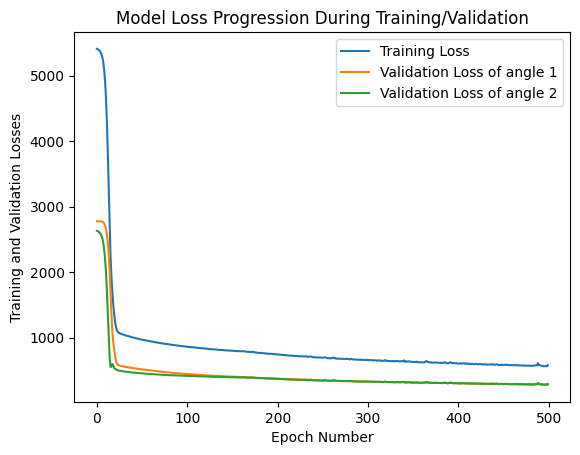

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['y_q_layer_loss'])
plt.plot(history.history['y_t_layer_loss'])


plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss of angle 1', 'Validation Loss of angle 2'])

dict_keys(['loss', 'y_q_layer_loss', 'y_t_layer_loss', 'y_q_layer_root_mean_squared_error', 'y_t_layer_root_mean_squared_error', 'val_loss', 'val_y_q_layer_loss', 'val_y_t_layer_loss', 'val_y_q_layer_root_mean_squared_error', 'val_y_t_layer_root_mean_squared_error'])


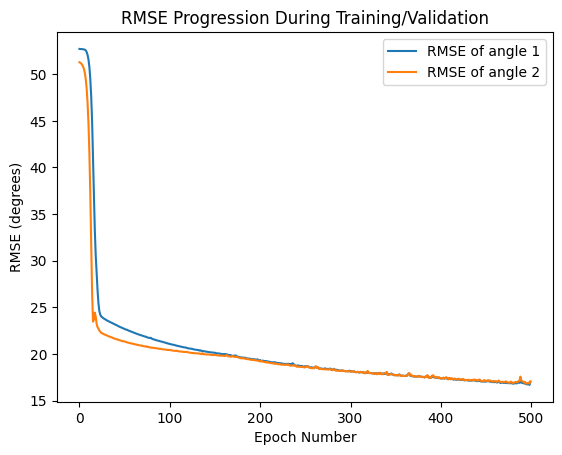

In [ ]:
print(history.history.keys())

plt.plot(history.history['y_q_layer_root_mean_squared_error'])
plt.plot(history.history['y_t_layer_root_mean_squared_error'])


plt.title('RMSE Progression During Training/Validation')
plt.ylabel('RMSE (degrees)')
plt.xlabel('Epoch Number')
plt.legend(['RMSE of angle 1', 'RMSE of angle 2'])

In [ ]:
predicitons=model.predict(test_X)

3/3 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae_one = mean_absolute_error(test_y[0],predicitons[0])

In [ ]:
mae_two = mean_absolute_error(test_y[1],predicitons[1])

In [ ]:
print(mae_one)

13.855291659633318


In [ ]:
print(mae_two)

14.95753178331587


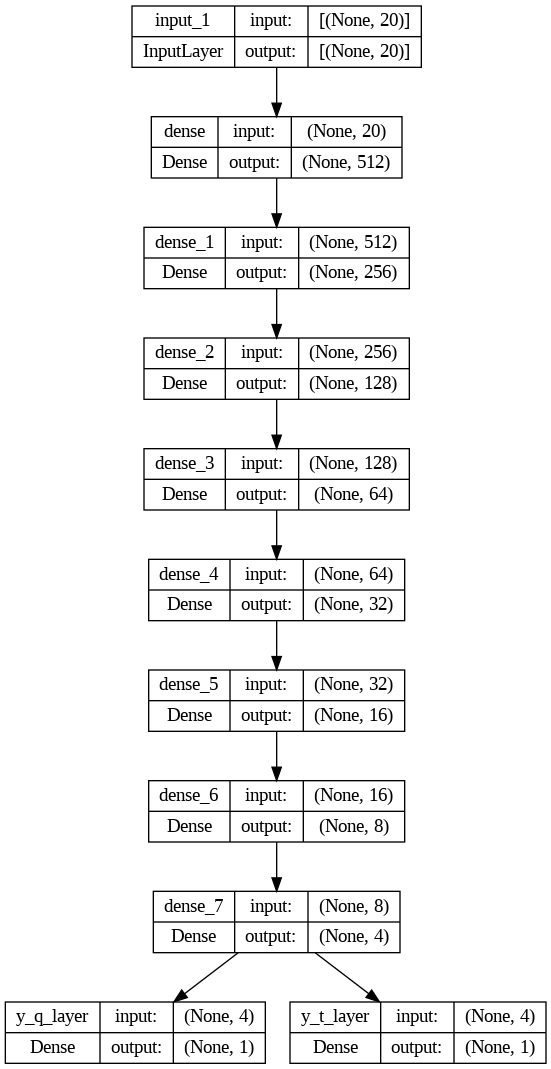

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.models import save_model , load_model
model.save('final_model.keras')